# Сверточные нейронные сети (CNN)

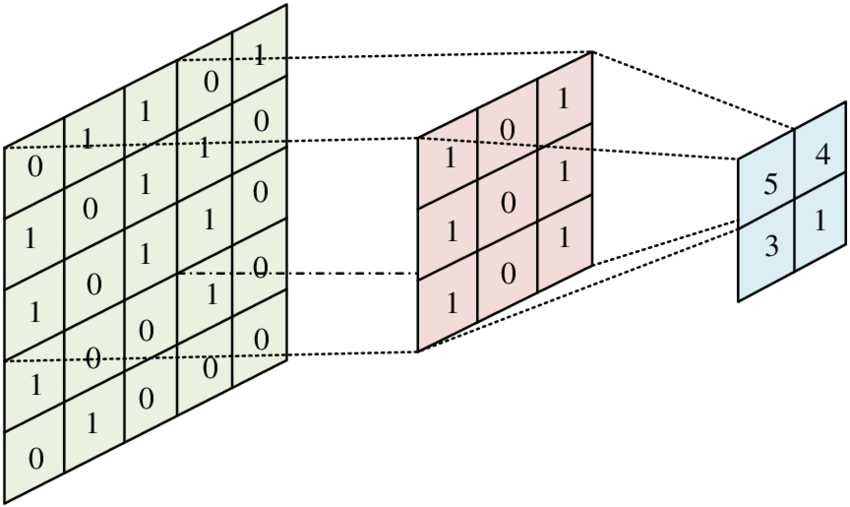

[Источник](https://www.researchgate.net/figure/Convolution-operation-diagram_fig1_374552194)

## Что мы изучим на этом занятии?

* Что такое свёртка?
* Свёрточный слой нейронной сети
* Свёрточная нейронная сеть
* Где используются свёрточные нейронные сети
* Преимущества и недостатки свёрточной нейронной сети
* Как создать свёрточную нейронную сеть?

## Что такое свёртка?

Свёртка (англ. Convolution) — это математическая операция, которая позволяет объединять два сигнала или функции, чтобы получить новую функцию, содержащую информацию о том, как одна из исходных функций изменяется в пределах другой.

> Сигнал — это просто функция, которая меняется во времени или в пространстве и несёт информацию. Это может быть что угодно: звук, изображение, температура, колебания акций и т. д.

В машинном обучении свёртка активно используется для обнаружения признаков, таких как контуры или текстуры в изображениях.

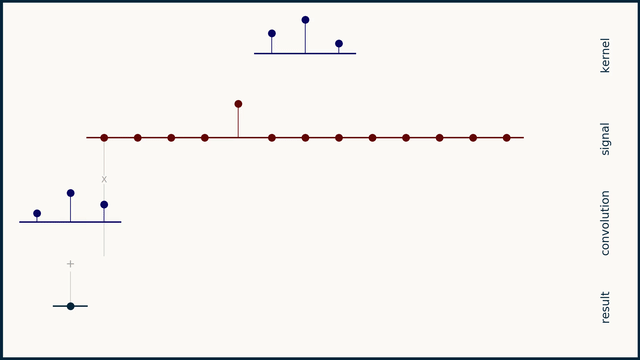

[Источник](https://e2eml.school/convolution_one_d.html)

Формально, непрерывная свёртка двух функций $f(t)$ и $g(t)$ записывается так:

$$
(f * g)(t) = \int_{-\infty}^{\infty} f(\tau) \, g(t - \tau) \, d\tau
$$

Здесь:

- $f(t)$ и $g(t)$ — это исходные функции,
- $*$ — обозначение операции свёртки,
- $t$ — переменная, зависящая от времени или координаты,
- $\tau$ — промежуточная переменная интегрирования, которая «скользит» по функции $f(t)$, а функция $g(t - \tau)$ сдвигается относительно неё.

В дискретной форме, которую чаще всего используют в машинном обучении, свёртка для последовательностей $f[n]$ и $g[n]$ записывается как:

$$
(f * g)[n] = \sum_{m=-\infty}^{\infty} f[m] \, g[n - m]
$$

В контексте обработки изображений, свёртка применяется как фильтр, который "скользит" по изображению (матрице пикселей) и преобразует его, выделяя важные признаки, например, контуры объектов.

## Сверточный слой нейронной сети

Свёрточный слой — это слой в нейронной сети, который выполняет операцию свёртки на входные данные, чаще всего на изображение, чтобы выявить важные признаки, такие как края, текстуры или углы.

### Основные элементы свёрточного слоя

#### Ядро свёртки или фильтр (англ. kernel, filter)

Небольшая матрица весов, например, размером $3 \times 3$ или $5 \times 5$, которая "скользит" по входному изображению и вычисляет скалярное произведение с каждым его участком. Этот процесс выделяет признаки изображения, такие как контуры или текстуры.

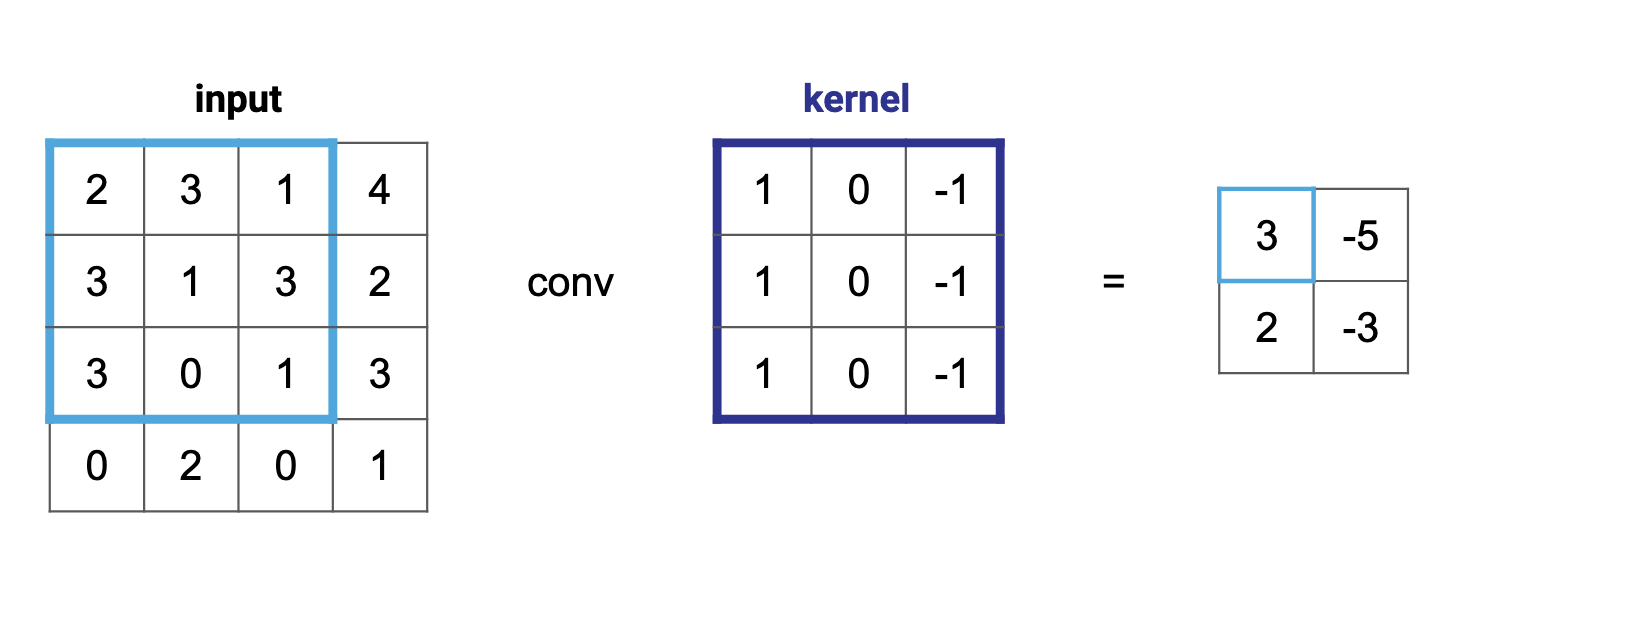

[Источник](https://8thlight.com/insights/what-is-a-convolution-how-to-teach-machines-to-see-images)

#### Шаг (англ. stride)

Расстояние, на которое ядро свёртки сдвигается по изображению. Шаг определяет, насколько сильно сжимается изображение после свёртки.

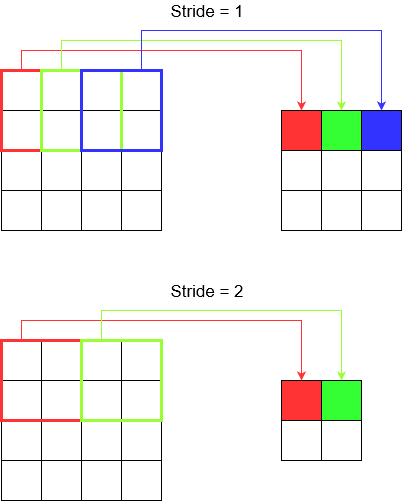

[Источник](https://stackoverflow.com/questions/42883547/intuitive-understanding-of-1d-2d-and-3d-convolutions-in-convolutional-neural-n)

#### Заполнение (англ. padding)

Добавление дополнительных пикселей (обычно с нулевыми значениями) вокруг границ изображения, чтобы контролировать размеры выходной карты признаков.

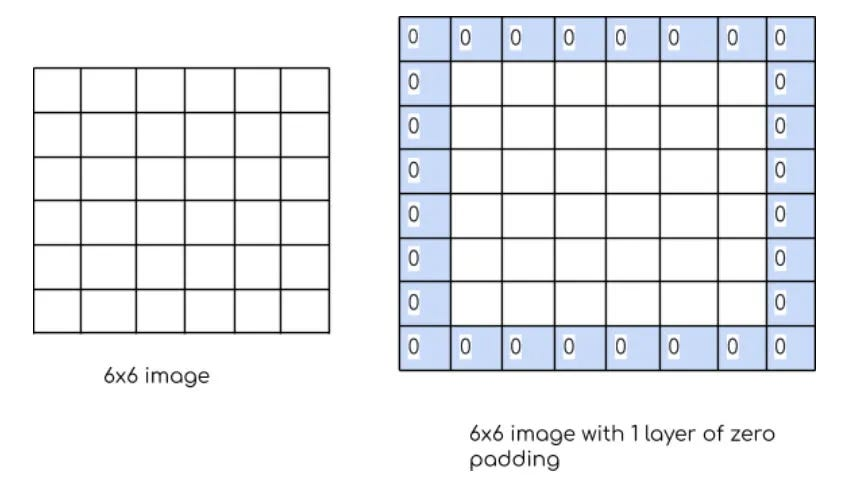

[Источник](https://ruhelalakshya.medium.com/convulational-padding-and-stride-59cb1b20c919)

#### Растяжение (англ. dilation)

Это параметр в свёрточных слоях, который увеличивает расстояние между элементами ядра свёртки. В обычной свёртке ядро "скользит" по изображению и анализирует соседние пиксели, но при растяжении добавляются промежутки, что позволяет охватывать более крупные области изображения без увеличения размера ядра.

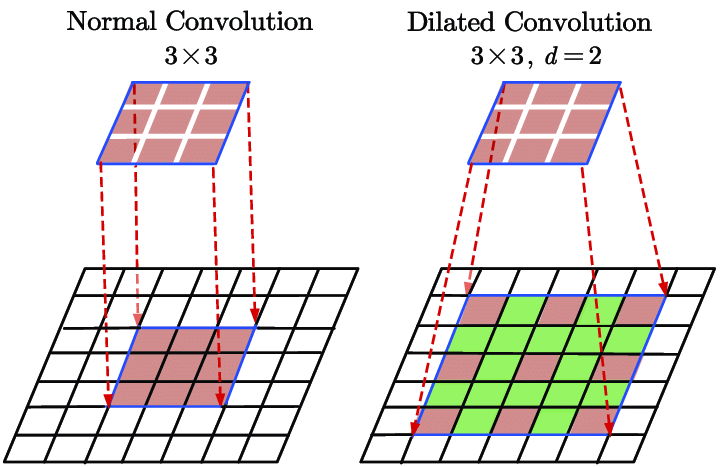

[Источник](https://www.researchgate.net/figure/The-illustration-of-the-2D-dilated-convolution-with-spatial-size-of-33-and-dilation_fig1_338780378)

### Принцип работы сверточного слоя

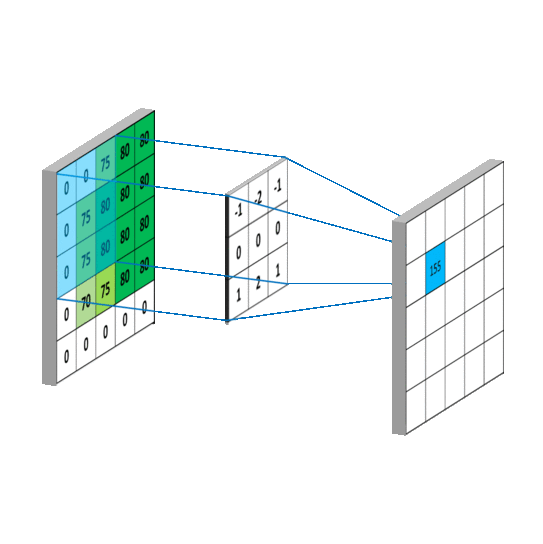

1. Ядро свёртки прикладывается к каждому участку изображения, начиная с верхнего левого угла.
2. Для каждой позиции ядра вычисляется сумма произведений его весов и значений пикселей под ним.
3. Результат записывается в выходную карту признаков (feature map).
4. Ядро сдвигается на величину шага и процесс повторяется.

Результат свёрточного слоя — это карта признаков, которая отражает наличие или отсутствие определённых признаков, таких как контуры или формы, что помогает сети "понимать" содержание изображения.

Размер выходной карты признаков $(H_{out}, W_{out})$ можно рассчитать по следующей формуле:



$$H_{out} = \left\lfloor\frac{H_{in} + 2 \times \text{padding[0]} - \text{dilation[0]} \times (\text{kernel_size[0]} - 1) - 1}{\text{stride}[0]} + 1\right\rfloor$$

$$W_{out} = \left\lfloor\frac{W_{in} + 2 \times \text{padding}[1] - \text{dilation}[1] \times (\text{kernel_size}[1] - 1) - 1}{\text{stride}[1]} + 1\right\rfloor$$



где $H_{in}$ и $W_{in}$ - высота и ширина входного тензора соответственно.

## Слой подвыборки в нейронной сети

Слой подвыборки (англ. Pooling Layer) — это слой в свёрточной нейронной сети, который используется для уменьшения размерности выходных данных, сохраняя при этом важные признаки. Основная цель подвыборки — снизить количество параметров и вычислительных затрат, а также повысить устойчивость сети к небольшим сдвигам и искажениям в данных.

Основные типы подвыборки:

1. **Макспулинг (Max Pooling)**: Выбирает максимальное значение из каждого участка (обычно $2 \times 2$) карты признаков, оставляя только наибольшие значения. Это помогает выделить самые яркие и значимые признаки, такие как края.

2. **Среднее значение (Average Pooling)**: Вычисляет среднее значение каждого участка, что даёт более сглаженный результат, но используется реже, чем макспулинг.

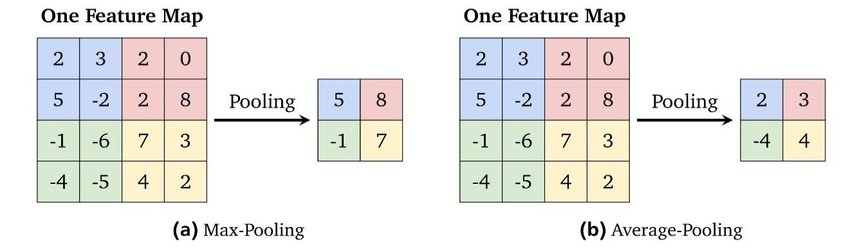

[Источник](https://www.researchgate.net/figure/Example-for-the-max-pooling-and-the-average-pooling-with-a-filter-size-of-22-and-a_fig15_337336341)

## Свёрточная нейронная сеть

Свёрточная нейронная сеть (англ. Convolutional Neural Network, CNN) — это тип нейронной сети, разработанный для анализа данных с сетчатой структурой, например, изображений. Она использует свёрточные слои, которые выделяют признаки, такие как края, текстуры и формы, путём применения фильтров (ядер) к данным.

Собрав все слои, которые мы с вами изучили на данный момент, мы можем собрать вот такую простую свёрточную нейронную сеть:

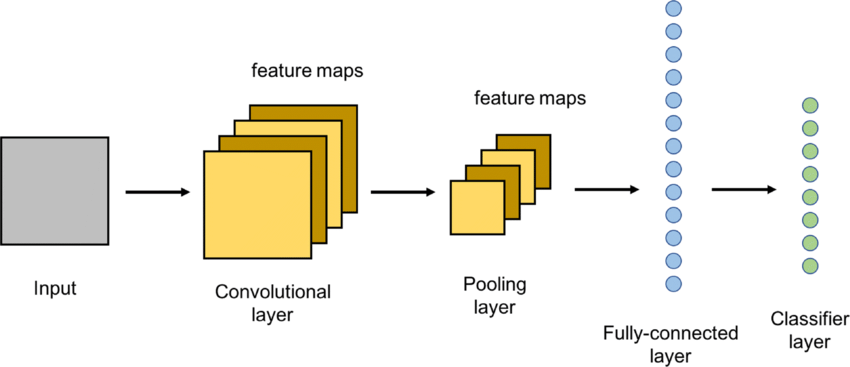

[Источник](https://www.researchgate.net/figure/A-simple-convolutional-neural-network-CNN-and-its-main-layers_fig1_339008531)

## Где используются свёрточные нейронные сети?

Сверточные нейронные сети (CNN) широко применяются в задачах, где важно распознавать и анализировать особенности в данных, особенно в пространственной информации. Вот несколько ключевых областей применения:

1. **Обработка изображений**:
   - **Классификация изображений**: Определение объектов на изображениях (например, распознавание животных или автомобилей).
   - **Обнаружение объектов**: Поиск объектов на изображении и определение их положения (например, в автономных автомобилях для обнаружения пешеходов и других машин).
   - **Сегментация изображений**: Разделение изображения на области, соответствующие разным объектам или участкам (используется в медицинской диагностике, например, для выявления опухолей).
   - **Сжатие изображений**: Уменьшение размера изображений без сильной потери качества.

2. **Компьютерное зрение**:
   - **Распознавание лиц**: Используется в системах безопасности и авторизации по биометрии.
   - **Видеоанализ**: Отслеживание движения объектов, распознавание событий и действий в видеопотоке (например, в системах видеонаблюдения или спортивной аналитике).

3. **Обработка текста и языка**:
   - **Анализ текста и языка**: CNN применяются для анализа текстов, выявления ключевых слов и синтаксических структур (например, в задачах классификации текста или анализа тональности).
   - **Обработка звуков и речи**: В задачах распознавания речи или анализа аудиосигналов (например, распознавание слов в аудиофайлах или выделение эмоций по голосу).

4. **Медицина**:
   - **Анализ медицинских изображений**: Обнаружение заболеваний на рентгеновских снимках, МРТ и КТ (например, выявление опухолей или аномалий в мозге).
   - **Геномика**: Анализ последовательностей ДНК и РНК для выявления паттернов и мутаций.

5. **Автономные транспортные средства**:
   - **Распознавание окружающей среды**: Обработка данных с камер для распознавания дорог, знаков, пешеходов и других машин.

6. **Дополненная и виртуальная реальность**:
   - **Анализ и обработка изображений в реальном времени**: Распознавание объектов в виртуальном пространстве и добавление цифровых объектов в реальный мир.

7. **Финансовая аналитика**:
   - **Анализ временных рядов**: Хотя чаще используются рекуррентные сети, CNN могут быть полезны для выявления аномалий и трендов в данных, таких как колебания фондового рынка.


## Преимущества и недостатки свёрточной нейронной сети

### Преимущества CNN

1. **Эффективное выделение признаков**: Благодаря свёрточным слоям, CNN способны автоматически выявлять ключевые признаки в данных (такие как края, текстуры и формы), что делает их особенно эффективными для обработки изображений.

2. **Меньше параметров**: В отличие от полносвязных сетей, CNN не связывают каждый нейрон со всеми остальными, а используют свёртки на локальных областях данных. Это снижает количество параметров, уменьшая требования к памяти и вычислительным ресурсам.

3. **Инвариантность к сдвигам и искажениям**: За счёт подвыборки и свёрток CNN могут распознавать объекты, даже если те немного смещены или искажены на изображении, что повышает надёжность распознавания в реальных условиях.

4. **Подходят для работы с данными сетчатой структуры**: CNN идеально подходят для анализа изображений, звуков и временных рядов, где структура данных имеет пространственную или временную сетчатую организацию.



### Недостатки CNN

1. **Высокие вычислительные затраты**: Обработка изображений и больших данных с использованием CNN требует мощных вычислительных ресурсов и графических процессоров (GPU), особенно при работе с глубокими сетями и большими наборами данных.

2. **Чувствительность к масштабированию**: CNN часто испытывают трудности при изменении масштаба объектов, так как масштаб не учитывается в стандартных свёртках. Для решения этой проблемы требуется сложная настройка или использование более продвинутых архитектур.

3. **Потребность в большом количестве данных для обучения**: CNN требуют больших наборов данных для эффективного обучения, особенно при решении сложных задач, таких как классификация изображений. Для малых наборов данных их обучение может оказаться затруднительным и привести к переобучению.

4. **Отсутствие интерпретируемости**: Внутренние процессы CNN трудно интерпретировать. Хотя можно видеть, какие признаки сеть выделяет на изображении, понять логику классификации сложных сетей бывает сложно.

## Как создать свёрточную нейронную сеть?

Классификация изображений - одна из самых распространенных задач в компьютерном зрении, и свёрточные нейронные сети особенно хорошо подходят для решения этой задачи. Мы можем взять датасет [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) и построить CNN для классификации изображений. CNN будет основан на слое [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html).

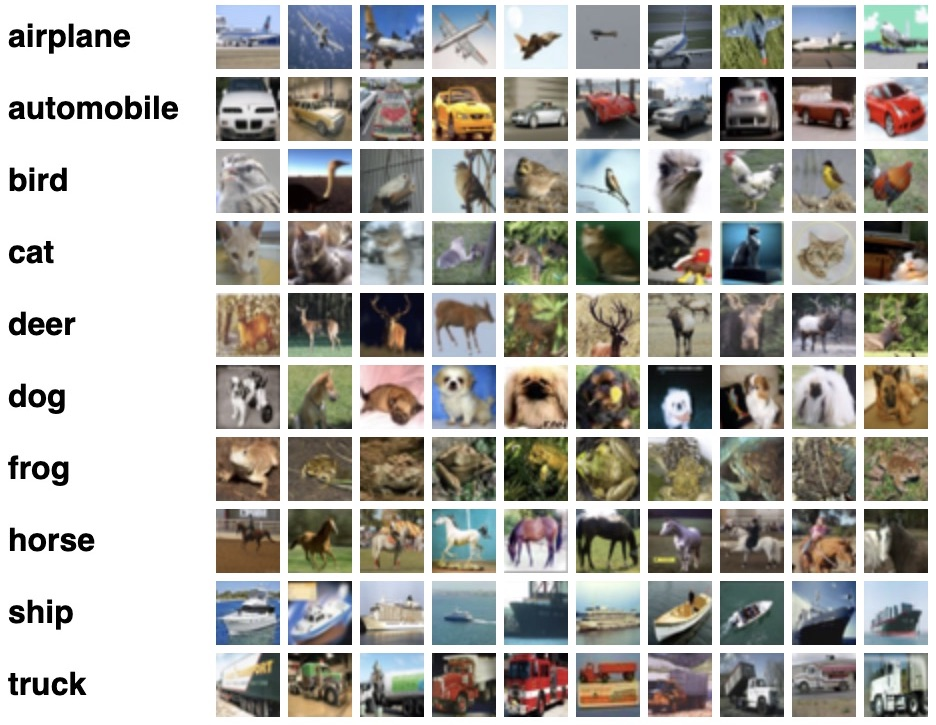

Для начала импортируем библиотеки и настроим device:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

Теперь мы построим простую CNN, содержащую три свёрточных слоя, подвыборочный слой и два линейных слоя для классификации. В архитектуре этой нейросети также используются
1. [transforms.Normalize](https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html)
2. [nn.MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)
3. [nn.Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html),

про которые вы можете почитать самостоятельно.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # Нормализуем входные изображения так, чтобы они имели среднее значение 0.5 и стандартное отклонение 0.5 для каждого канала
        self.transform = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

        # Определяем первый свёрточный слой с 3 входными каналами (RGB), 32 выходными каналами,
        # размером ядра 3 и дополнением 1 для сохранения размерности входа
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)

        # Определяем второй свёрточный слой с 32 входными каналами, 64 выходными каналами,
        # размером ядра 3 и дополнением 1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Определяем третий свёрточный слой с 64 входными каналами, 128 выходными каналами,
        # размером ядра 3 и дополнением 1
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Определяем слой максимального пулинга с размером ядра 2 и шагом 2
        self.pool = nn.MaxPool2d(2, 2)

        # Определяем полносвязный слой, который принимает развернутый выход свёрточных слоёв
        # (128 каналов * 4 * 4) и выводит 512 признаков
        self.fc1 = nn.Linear(128 * 4 * 4, 512)

        # Определяем ещё один полносвязный слой, который отображает 512 признаков на 100 выходных классов
        self.fc2 = nn.Linear(512, 100)

        # Определяем слой дропаута с вероятностью 0.1 для предотвращения переобучения
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        # Применяем нормализацию
        x = self.transform(x)

        # Применяем первый свёрточный слой, затем активацию ReLU и максимальный пулинг
        x = self.pool(F.relu(self.conv1(x)))

        # Применяем второй свёрточный слой, затем активацию ReLU и максимальный пулинг
        x = self.pool(F.relu(self.conv2(x)))

        # Применяем третий свёрточный слой, затем активацию ReLU и максимальный пулинг
        x = self.pool(F.relu(self.conv3(x)))

        # Разворачиваем тензор для подготовки к полносвязным слоям
        x = x.view(-1, 128 * 4 * 4)

        # Применяем первый полносвязный слой с дропаутом и активацией ReLU
        x = self.dropout(F.relu(self.fc1(x)))

        # Применяем второй полносвязный слой для получения окончательного вывода
        x = self.fc2(x)

        return x


Загрузим датасет:

In [ ]:

# Определяем преобразования для обучающего и тестового наборов
transform = transforms.ToTensor()

# Загружаем датасет CIFAR-100
train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Создаём загрузчики данных
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Создайте модель, оптимизатор и функцию потерь:

In [ ]:
# Инициализируем модель
model = SimpleCNN().to(device)

# Определяем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Цикл обучения модели:

In [ ]:
# Цикл обучения
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Прямой проход
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Обратный проход и оптимизация
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Выводим каждые 100 мини-батчей
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print('Обучение завершено')


Оценка модели путем вычисления macro F1:

In [ ]:
from sklearn.metrics import f1_score

# Инициализируем списки для хранения истинных и предсказанных меток
true_labels, pred_labels = [], []

# Цикл оценки
model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)

        outputs = model(images)

        # Получаем предсказанный класс, беря максимальное значение по размерности 1
        _, predicted = torch.max(outputs.data, 1)

        true_labels += labels.tolist()
        pred_labels += predicted.tolist()

print("Макро F1 оценка:")
print(f1_score(true_labels, pred_labels, average='macro'))


Давайте посмотрим, как CNN будет классифицировать некоторые тестовые изображения:

In [ ]:
import numpy as np

# Функция для обратной нормализации и отображения изображения
def imshow(img):
    img = img / 2 + 0.5  # Обратная нормализация
    if device == 'cuda':
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Получаем несколько случайных тестовых изображений
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Предсказываем с помощью модели
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

# Создаём сетку изображений с заголовками, указывающими предсказанные метки
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(images[i].permute(1, 2, 0).numpy())
    axes[i].set_title(f'Предсказание: {test_dataset.classes[predicted[i]]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## Упражнение 1

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше и в предыдущих занятиях*

В данном упражнении вам необходимо создать свёрточную нейронную сеть для классификации изображений рукописных чисел. В качестве датасета мы возьмем [MNIST](https://en.wikipedia.org/wiki/MNIST_database) датасет, состоящий из изображений рукописных чисел размером 28x28 пикселей

Для начала импортируем необходимые модули:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Создадим девайс, с которым будем работать:

In [ ]:
# Проверяем, доступен ли GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Создадим простую сверточную нейросеть:

In [ ]:
# Определяем простую свёрточную нейронную сеть для MNIST
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # Первый свёрточный слой
        # Входной канал = 1 для изображений MNIST (чёрно-белые)
        # in_channels=1, out_channel=32, kernel_size=3, padding=1
        self.conv1 = ...

        # Второй свёрточный слой
        # in_channels=32, out_channel=64, kernel_size=3, padding=1
        self.conv2 = ...

        # Слой максимального пулинга
        # размер 2x2
        self.pool = ...

        # Первый линейный слой 64 * 7 * 7 на 128
        self.fc1 = ...

        # Второй линейный слой 128 на 10
        # 10 классов для MNIST (цифры от 0 до 9)
        self.fc2 = ...

        # Слой дропаута для предотвращения переобучения
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        # Применяем первый свёрточный слой, ReLU и пулинг
        x = ...
        # Применяем второй свёрточный слой, ReLU и пулинг
        x = ...
        # Разворачиваем тензор для полносвязных слоёв
        x = x.view(-1, 64 * 7 * 7)
        # Применяем первый полносвязный слой с дропаутом и активацией ReLU
        x = self.dropout(F.relu(self.fc1(x)))
        # Применяем второй полносвязный слой для получения окончательного вывода
        x = self.fc2(x)
        return x

Загружаем данные и создаем DataLoader-ы:

In [ ]:
# Определяем преобразования для обучающего и тестового наборов
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Нормализуем изображения
])

# Загружаем датасет MNIST
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Создаём загрузчики данных
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Создаем модель, функцию потерь, и отптимизатор:

In [ ]:
# Инициализируем модель и загружаем в девайс
model = ...

# Определяем функцию потерь CrossEntropyLoss
criterion = ...
# Определяем оптимизатор Adam с lr=0.001
optimizer = ...

Основной цикл обучения:

In [ ]:
# Задаем количество эпох для обучения
num_epochs = 10

# Итерация по эпохам
for epoch in range(num_epochs):
    # Переводим модель в режим обучения
    ...

    # Инициализируем переменную для хранения текущей потери
    running_loss = 0.0

    # Итерация по батчам из загрузчика данных
    for i, data in enumerate(train_loader, 0):

        # Извлекаем входные данные и метки из текущего батча
        inputs, labels = data

        # Перемещаем входные данные на девайс
        inputs = ...
        # Перемещаем метки на девайс
        labels = ...

        # Обнуляем градиенты оптимизатора
        ...

        # Получаем выходные данные модели
        outputs = ...

        # Вычисляем функцию потерь
        loss = ...

        # Вычисляем градиенты потерь
        ...

        # Обновляем параметры модели на основе вычисленных градиентов
        ...

        # Добавляем значение потерь к текущей сумме
        running_loss += loss.item()

        # Каждые 100 батчей выводим информацию о текущем этапе обучения
        if i % 100 == 99:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0  # Сбрасываем текущую сумму потерь

print('Обучение завершено')

Оценим качество классификации с помощью метрики macro F1:

In [ ]:
from sklearn.metrics import f1_score

# Инициализируем списки для хранения истинных и предсказанных меток
true_labels, pred_labels = [], []

# Переводим модель в режим оценки (выключаем дроп-аут и обновление градиентов)
model.eval()

# Отключаем вычисление градиентов для экономии памяти и ускорения вычислений
with torch.no_grad():

    # Итерация по батчам из тестового загрузчика данных
    for data in test_loader:
        # Извлекаем изображения и истинные метки из текущего батча
        images, labels = data

        # Перемещаем изображения на устройство (CPU или GPU)
        images = ...

        # Получаем предсказания модели для текущих изображений
        outputs = ...

        # Получаем предсказанный класс
        _, predicted = ...

        # Добавляем истинные метки в список
        true_labels += labels.tolist()

        # Добавляем предсказанные метки в список
        pred_labels += predicted.tolist()

# Выводим макро F1 оценку
print("Макро F1 оценка:")  # Сообщаем о начале вывода F1-оценки
print(f1_score(true_labels, pred_labels, average='macro'))  # Вычисляем и выводим макро F1 оценку


Визуализируем предсказания:

In [ ]:
import numpy as np

# Функция для отображения изображений
def imshow(img):
    img = img / 2 + 0.5  # Обратная нормализация
    if device == 'cuda':
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')

# Получаем несколько случайных тестовых изображений
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Предсказываем с помощью модели
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

# Создаём сетку изображений с заголовками, указывающими предсказанные метки
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(images[i].squeeze(), cmap='gray')  # Для MNIST используем серый цвет
    axes[i].set_title(f'Предсказание: {predicted[i].item()}')  # Используем предсказанные метки
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Заключение

Мы познакомились с фундаментальными концепциями свёрточных нейронных сетей (CNN), которые являются ключевыми в области компьютерного зрения и обработки изображений. Мы начали с основных понятий, таких как свёртка, свёрточный слой, слой подвыборки и рассмотрели, как эти элементы сочетаются в архитектуре CNN.

Мы также обсудили преимущества и недостатки CNN, отметив их способность эффективно выделять признаки, инвариантность к сдвигам и искажениям, а также их применимость к данным с сетчатой структурой. В то же время, мы упомянули о высоких вычислительных затратах, чувствительности к масштабированию и потребности в больших объёмах данных для обучения.

Для практического применения теоретических знаний мы построили простую CNN для классификации изображений из датасета CIFAR-100. Мы прошли через все этапы создания модели, от определения архитектуры до обучения и оценки её производительности с использованием метрики макро F1.

Наконец, мы выполнили упражнение по созданию CNN для классификации рукописных цифр из датасета MNIST, закрепив тем самым полученные знания на практике.